# Plot Benchmarking Results

Plots the results in `benchmarks.csv`

In [9]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Read `benchmarks.csv`

This file is generated using [portable-full-comparison.ipynb](https://hub.cryointhecloud.com/hub/user-redirect/lab/tree/h5cloud/notebooks/portable-full-comparison.ipynb)

In [4]:
df = pd.read_csv("benchmarks.csv", index_col=0)
df.head()

,tool,dataset,cloud-aware,format,file,time,mean,size,product
0,h5py,ATL03-1GB,no,original,s3://nasa-cryo-persistent/h5cloud/atl03/averag...,2.843794,386.06738,1GB,ATL03
1,h5py,ATL03-1GB,no,optimized,s3://nasa-cryo-persistent/h5cloud/atl03/averag...,4.157145,386.06738,1GB,ATL03
2,h5py,ATL03-7GB,no,original,s3://nasa-cryo-persistent/h5cloud/atl03/big/or...,6.949410,1035.1631,7GB,ATL03
3,h5py,ATL03-7GB,no,optimized,s3://nasa-cryo-persistent/h5cloud/atl03/big/re...,13.658601,1035.1631,7GB,ATL03
4,h5py,ATL03-2GB,no,original,s3://nasa-cryo-persistent/h5cloud/atl03/big/or...,1.405302,2049.7554,2GB,ATL03


## Reformat data for plotting

In [5]:
pivot_df = df.pivot_table(index=["tool", "size"], columns=["format", "cloud-aware"], values="time", aggfunc="mean")
pivot_df

format         optimized             original           
cloud-aware           no       yes         no        yes
tool     size                                           
h5coro   1GB    4.286047       NaN   4.562052        NaN
         2GB    1.812065       NaN   3.110127        NaN
         7GB   11.794484       NaN  14.072926        NaN
h5py     1GB    4.157145  1.930223   2.843794   1.861841
         2GB    1.085173  0.863328   1.405302   1.260476
         7GB   13.658601  5.758351   6.949410   6.602762
kerchunk 7GB    8.813402       NaN  10.746919        NaN
xarray   1GB   10.258675  2.542990  46.503087  42.182489
         2GB   18.109654  2.156572  47.506707  40.316141
         7GB   81.675182  6.671923  62.896237  48.714591

## Plot results

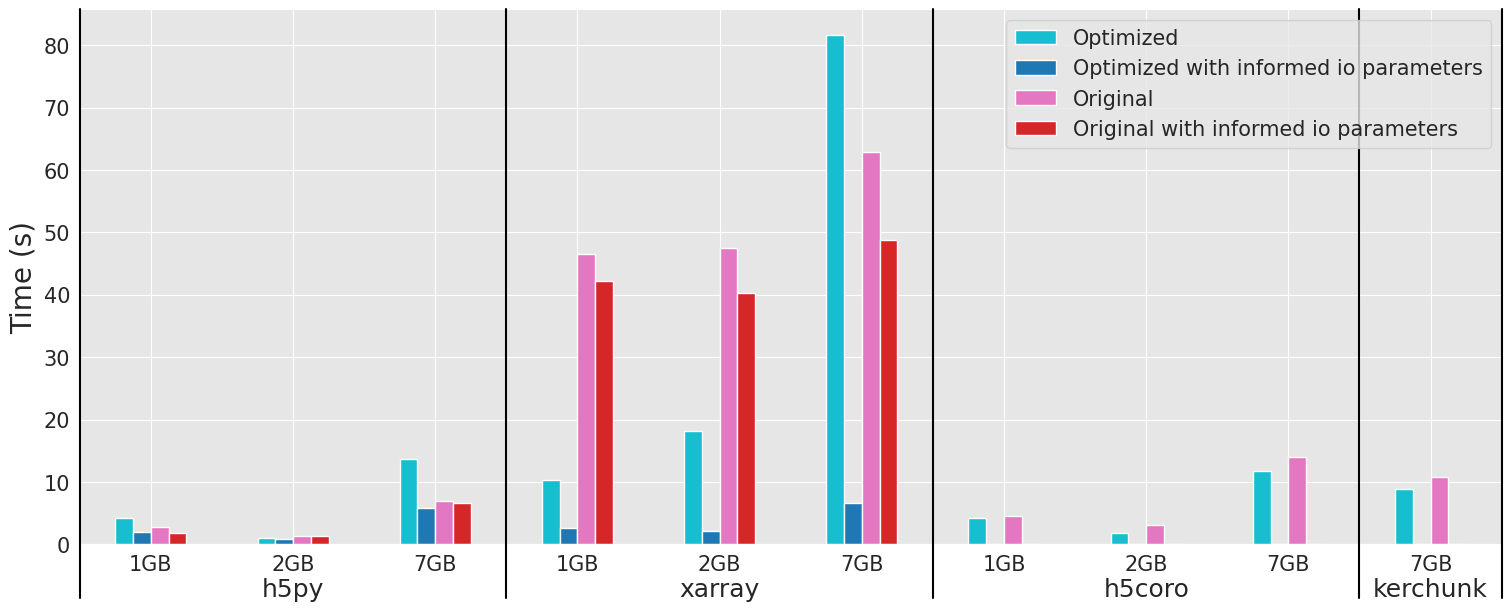

In [14]:
# Set seaborn plot style
sns.set_style("darkgrid", rc={'axes.facecolor': '0.9'})

tool_order = ["h5py", "xarray", "h5coro", "kerchunk"]
# Create figure and axis to "contain" plot - allows customization via ax object
fig, ax = plt.subplots(figsize=(15,6), layout="constrained")

# Plot results
pivot_df.loc[tool_order,:].plot(kind="bar", ax=ax, 
                                                              color=["tab:cyan", "tab:blue", "tab:pink", "tab:red"],
                                                              xlabel="", fontsize=15);
ax.legend(labels = ["Optimized", "Optimized with informed io parameters", "Original", "Original with informed io parameters"], fontsize=15)
ax.set_ylabel("Time (s)", fontsize=20)

## Make two level axis

# helper to create axis labels
def parse_text(s):
    return re.sub(r"[()]", "", s).split(", ")

# Retrieve and parse axis labels and position
tool, size, x, y = map(np.array, zip(*[(*parse_text(l.get_text()), *l.get_position()) for l in ax.get_xticklabels()]))
# Make labels and x-positions for seconary axis
sec_x, sec_label = zip(*[(x[tool == tool_name].mean(), "\n"+tool_name) for tool_name in np.unique(tool)])
# Assign ticks and labels
ax.set_xticks(x, size, rotation=0);
sec = ax.secondary_xaxis(location=0);
sec.set_xticks(sec_x, sec_label, fontsize=18);
sec.tick_params(length=0)

sepa_x = np.array([x[tool == tool_name].min()-0.5 for tool_name in np.unique(tool)] + [x.max()+0.5])
[ax.axvline(xs, c='k', ymin=-.1, clip_on=False, zorder=3) for xs in sepa_x];

# Uncomment to save figure
# fig.savefig("access_time.summary.png")